#PROJECT 3 - GRAPH THEORY - MINIMUM CUT
KARGER ALGORITHM IMPLEMENTATION
NAIVE ALGORITHM FOR MINIMUM CUT

IMPLEMTENTAÇÃO DO ALGORITMO DE CORTE MÍNIMO DE KARGER
1) escolho uma aresta aleatória
2) faço a contração dessa aresta, criando um supervértice (Cada contração aumentará esse supervértice ou criará um novo supervértice)
3) faço esse procedimento acima até ter apenas 1 aresta ou 2 vértices (vertice orignal+supervertice ou supervertice + supervertice)

Como conto os cortes?

Os vértices que contém duas ou mais arestas vão ser levados para um supervértice por uma delas, mas não pelas outras. Estas que sobram serão as somadas para o corte ao final


In [5600]:
import pandas as pd
import numpy as np
import random
import copy
from collections import Counter
import matplotlib.pyplot as plt

In [5601]:
class Graph:
    def __init__(self, archive):
        self.nvertex, self.adjmatrix, self.adjlist = self.openFile(archive)

    def openFile(self, archive):
        with open(archive, 'r') as file:
            nvertex = int(file.readline())
            line = file.readlines()
            adjmatrix = [list(map(lambda x: int(x), l.split())) for l in line[0:]]
            adjlist = [[] for _ in range(nvertex)]

            for i in range(nvertex):
                for j in range(nvertex):
                    if adjmatrix[i][j] == 1:
                        adjlist[i].append(j)

        return nvertex, adjmatrix, adjlist

    def printMatrix(self):
        print("Adjacency Matrix:")
        print(" ", np.arange(0, len(self.adjmatrix), 1))
        for i, l in enumerate(self.adjmatrix):
            print(f'{i} |{" ".join(map(str, l))}')

    def printList(self):
        print("\nAdjacency List:")
        for i, ladj in enumerate(self.adjlist):
            print(f'{i}: {"-> ".join(map(str, ladj))}')

In [5602]:
class Karger:
    def __init__(self, adj_list):
        self.adjlist = adj_list
        self.max = len(self.adjlist) #larger vertex
        self.edges = []
        self.cortes = []

        
    def Edges(self): # getting all graph edges
      for i in range(0, len(self.adjlist)): 
        for j in self.adjlist[i]: 
          if [j,i] not in self.edges: #nao quero que seja uma tupla, pois nao poderei modificar
            self.edges.append([i,j]) 
      return self.edges

    def fundir_supernos(self, supernos, vertice, resultado):
        #essa função vai fundir os supernos, ou seja encontrar os supernos na aresta final
        #e ver de quem ele é composto, é a composição de cada superno que sai ao final
        #a aresta final pode ser composta de dois supernos 
        #ou pode ser composta de um superno e um vertice original, caso o grafo seja muito pequeno
        vertices = []
        for nos in range(len(supernos)):
            for i in range(len(vertice)):
                if vertice[i] == supernos[nos][0]:
                    vertice = supernos[nos][1]
                    resultado.extend(vertice)
                    resultado = self.fundir_supernos(supernos, [vertice[0]], resultado)
                    resultado = self.fundir_supernos(supernos, [vertice[1]], resultado)
        #vendo os nomes dos supervertices                
        for i in range(len(supernos)):
            vertices.append(supernos[i][0])
        #removendo os nomes dos supervertices do resultado final para ficar apenas os vertices originais juntados
        for i in vertices:
            if i in resultado:
                resultado.remove(i)
        
        return sorted(resultado)


    def karger(self, count):
        newnode = self.max-1 #representara o novo no, que sera sempre um super no
        #dicionario para saber quais vertices estao nesse novo no
        nodedict = []
        #count = 1000
        cortes = []
        edgeslist = copy.deepcopy(self.edges)
  
        while (count > 0):   
            edgescopy = edgeslist[:]
            unused_indexes = list(range(len(self.edges)))

            while(len(edgescopy) > 1): #len(edgeslist) > 2
                newnode += 1
                choosen_index = random.choice(unused_indexes)
                choosen = edgeslist[choosen_index]
                u, v = choosen

                #deixando apenas os indices das aretas não usadas para rastrear depois
                unused_indexes.remove(choosen_index)
                #removendo a aresta usada
                if choosen in edgescopy:
                    edgescopy.remove(choosen)
                if sorted(choosen, reverse=True) in edgescopy:
                    edgescopy.remove(sorted(choosen, reverse=True))

                #juntar u e v como a superaresta
                for edge in edgeslist: 
                    for i in range(len(edge)):
                        if edge[i] == v or edge[i] == u:
                            edge[i] = newnode
                            
                #componto o novo no e seus adjacentes
                nodedict.append([newnode, [u, v]])
   
                # #REMOVER ARESTAS REPETIDAS:
                i = 0
                while i < len(edgescopy):
                    j = i + 1
                    while j < len(edgescopy):
                        if sorted(edgescopy[i]) == sorted(edgescopy[j]):
                            del edgescopy[j]
                        else:
                            j += 1
                    i += 1
                n = len(edgeslist)
            count -= 1
            
            vertice1 = [edgescopy[0][0]]#edgeslist[0]
            superno1 = []
            novo_superno1 = self.fundir_supernos(nodedict, vertice1, superno1)

            superno2 = []
            vertice2 = [edgescopy[0][1]]#edgeslist[0]
            novo_superno2 = self.fundir_supernos(nodedict, vertice2, superno2)

            minCut = 0
            for i in unused_indexes:
                for edge in self.edges[i]:
                    if not novo_superno1:  # Se novo_superno1 estiver vazio, verifique em novo_superno2
                        if edge not in novo_superno2:
                            minCut += 1
                    else:
                        if edge not in novo_superno1:
                            minCut += 1
            #print("CORTE MINIMO:", minCut) 
            #print(count)
            if minCut > 0:
                cortes.append(minCut)
            edgeslist = copy.deepcopy(self.edges)
            minCut = 0
            
        # print("--------------------------------------------------------------------------------")
        # print("Aresta Final:", edgescopy)
        # print("Indices nao usados",unused_indexes)
        # print("Arestas nao usadas:", end = '')
        # for i in (unused_indexes):
        #     print(self.edges[i], end = ' ')
        # print("\nSUPERNO",edgescopy[0][0],":", novo_superno1)  # Saída: [{9: [0, 1, 2, 3, 4]}]
        # print("SUPERNO",edgescopy[0][1],":", novo_superno2)  # Saída: [{9: [0, 1, 2, 3, 4]}]
        # print("CORTE MINIMO:", cortes)
        # print("min: ",min(cortes), "max: ",max(cortes))
        minimo = min(cortes)
        
        nmin = cortes.count(minimo)
        probabilidade = round((nmin / len(cortes)),2)
        print("Probabilidade de encontrar o corte minimo", probabilidade)
        return probabilidade
        
        
        

In [5603]:
#OPEN GRAPH
archive = 'graph02.txt'
graph = Graph(archive)
graph.printMatrix()
graph.printList()

Adjacency Matrix:
  [0 1 2 3 4 5 6 7 8 9]
0 |0 0 1 0 1 0 1 0 0 0
1 |0 0 0 0 0 1 0 1 0 0
2 |1 0 0 1 1 1 0 0 0 1
3 |0 0 1 0 1 0 0 0 0 0
4 |1 0 1 1 0 0 0 0 0 0
5 |0 1 1 0 0 0 0 0 0 0
6 |1 0 0 0 0 0 0 1 0 0
7 |0 1 0 0 0 0 1 0 1 0
8 |0 0 0 0 0 0 0 1 0 1
9 |0 0 1 0 0 0 0 0 1 0

Adjacency List:
0: 2-> 4-> 6
1: 5-> 7
2: 0-> 3-> 4-> 5-> 9
3: 2-> 4
4: 0-> 2-> 3
5: 1-> 2
6: 0-> 7
7: 1-> 6-> 8
8: 7-> 9
9: 2-> 8


Probabilidade de encontrar o corte minimo 0.3
Probabilidade de encontrar o corte minimo 0.32
Probabilidade de encontrar o corte minimo 0.56
Probabilidade de encontrar o corte minimo 0.45
Probabilidade de encontrar o corte minimo 0.57
Probabilidade de encontrar o corte minimo 0.51
Probabilidade de encontrar o corte minimo 0.54
[0.3, 0.32, 0.56, 0.45, 0.57, 0.51, 0.54]


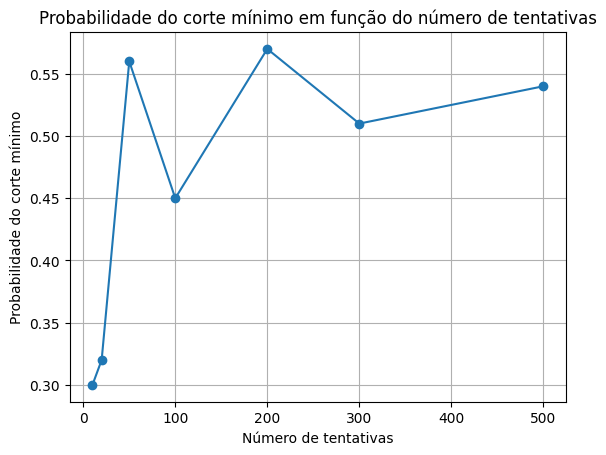

In [5604]:
kresponse = Karger(graph.adjlist)
kresponse.Edges();
probabilidade = []
count = [10, 20, 50, 100, 200, 300, 500]
for n in count:
    probabilidade.append(kresponse.karger(n));

print(probabilidade)
plt.plot(count, probabilidade, marker='o')
plt.xlabel('Número de tentativas')
plt.ylabel('Probabilidade do corte mínimo')
plt.title('Probabilidade do corte mínimo em função do número de tentativas')
plt.grid(True)
plt.show()